Number of times each ad slot was selected:
Top Banner: 897 times, Estimated CTR: 0.055
Sidebar: 60 times, Estimated CTR: 0.050
Footer: 23 times, Estimated CTR: 0.043
Pop-up: 20 times, Estimated CTR: 0.050

Total clicks after 1000 impressions: 54


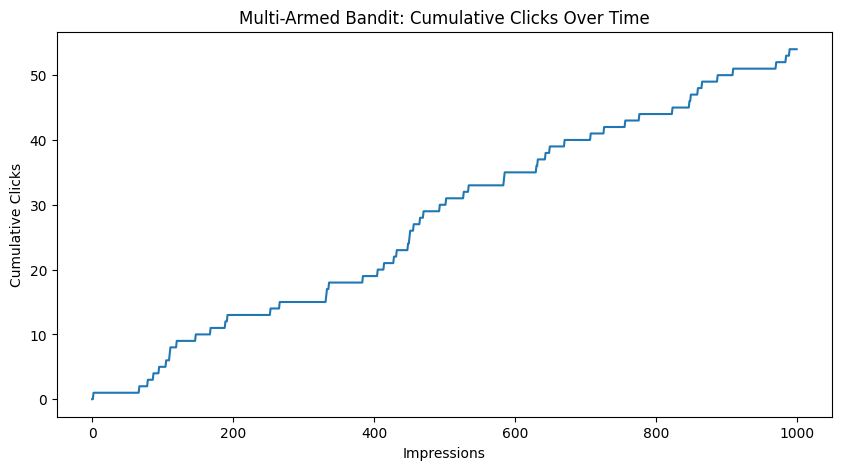

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define ad slots and their true click-through rates (CTR)
ad_slots = ["Top Banner", "Sidebar", "Footer", "Pop-up"]
true_ctr = [0.05, 0.10, 0.03, 0.07]  # These are unknown to the algorithm

# Epsilon-Greedy parameters
epsilon = 0.1  # 10% chance to explore
n_impressions = 1000

# Initialize estimated CTRs and counts
estimated_ctr = np.zeros(len(ad_slots))
n_selections = np.zeros(len(ad_slots))
total_rewards = 0
rewards_history = []

# Simulation
for i in range(n_impressions):
    # Epsilon-Greedy selection
    if np.random.rand() < epsilon:
        # Explore: choose a random ad slot
        slot = np.random.randint(len(ad_slots))
    else:
        # Exploit: choose the ad slot with highest estimated CTR
        slot = np.argmax(estimated_ctr)
    
    # Simulate showing ad and getting feedback (1 for click, 0 for no click)
    reward = 1 if np.random.rand() < true_ctr[slot] else 0
    
    # Update counts and estimated CTR
    n_selections[slot] += 1
    estimated_ctr[slot] += (reward - estimated_ctr[slot]) / n_selections[slot]
    
    # Track total reward
    total_rewards += reward
    rewards_history.append(total_rewards)

# Results
print("Number of times each ad slot was selected:")
for i in range(len(ad_slots)):
    print(f"{ad_slots[i]}: {int(n_selections[i])} times, Estimated CTR: {estimated_ctr[i]:.3f}")

print(f"\nTotal clicks after {n_impressions} impressions: {total_rewards}")

# Plot cumulative rewards over time
plt.figure(figsize=(10,5))
plt.plot(rewards_history)
plt.xlabel("Impressions")
plt.ylabel("Cumulative Clicks")
plt.title("Multi-Armed Bandit: Cumulative Clicks Over Time")
plt.show()